In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import pandas as pd

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex',
   preamble=[r'\usepackage{sansmath}',
             r'\usepackage{amsfonts}',
             r'\sansmath']) #r'\usepackage{DejaVuSans}'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'], 'size'   : 22})

rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)

%matplotlib inline

from colors import *

<ipython-input-1-f4eecd993604>:9: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rc('text.latex',


In [2]:
sns.set_style("whitegrid")

In [77]:
df = pd.read_pickle("../experiments/DKL/exact_uci_df.pkl")

In [78]:
df

,Dataset,Type,N,RMSE,m
0,boston,mll,100,0.328404,NA
1,boston,mll,100,0.358511,NA
2,boston,mll,100,0.332216,NA
3,boston,mll,100,0.425572,NA
4,boston,mll,100,0.534170,NA
...,...,...,...,...,...
1795,winewhite,cmll,700,0.933304,0.9
1796,winewhite,cmll,700,0.887885,0.9
1797,winewhite,cmll,700,0.847029,0.9
1798,winewhite,cmll,700,0.856180,0.9


In [79]:
my_pal = {"mll": sanae_colors[1], "cmll": sanae_colors[4]}

In [80]:
def PlotAx(ax, dset, m=0.9):
    sub_df = df[df['Dataset']==dset]
    box = sns.boxplot(x='N', y='RMSE', hue='Type', data=sub_df[sub_df['m'].isin(['NA', m])],
               ax=ax, showfliers=False, palette=my_pal)
    for patch in box.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
    sns.despine()
    ax.set_title(dset.capitalize(), fontsize=20)
    if dset == 'winewhite':
        ax.set_title("Wine, White", fontsize=20)
    elif dset == "winered":
        ax.set_title("Wine, Red", fontsize=20)
    ax.tick_params(axis='both', which='major', pad=0., labelsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend([],[], frameon=False)
    return box

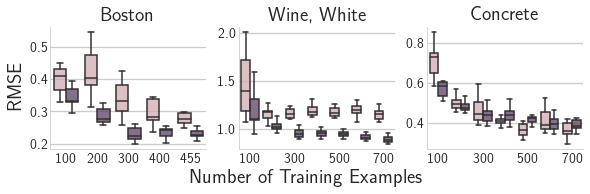

In [81]:
fig, arr = plt.subplots(1, 3, figsize=(8, 2.5))
# plt.subplots_adjust(hspace=0.3)
PlotAx(arr[0], 'boston')
PlotAx(arr[2], 'concrete')
box=PlotAx(arr[1], 'winewhite')

arr[1].set_xticks([0, 2, 4, 6])
arr[2].set_xticks([0, 2, 4, 6])
plt.tight_layout()

# legend = plt.legend([box.artists[0], box.artists[1]], ['LML', "CLML"],
#           fontsize=16, bbox_to_anchor=(.37, .4))

# legend.get_frame().set_linewidth(2)
# legend.get_frame().set_edgecolor("k")

fig.text(0.5, -0.01, "Number of Training Examples", va='center', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=20);
plt.savefig("../../Papers/marginal_likelihood/figures/DKL/rmse_small.pdf", bbox_inches='tight')
# plt.savefig("./rmse_small.pdf", bbox_inches="tight")

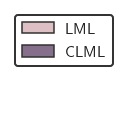

In [83]:
# ax = fig.get_axes()[0]
# handles = ax.get_legend_handles_labels()
# handles = (handles[0][:4], handles[1])
figlegend = plt.figure(figsize=(0.1,2))
legend = plt.legend([box.artists[0], box.artists[1]], ['LML', "CLML"], 
           loc ='upper left',
           fontsize=16,
           ncol=1
          )
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("k")
plt.axis("off")
plt.savefig("../../Papers/marginal_likelihood/figures/DKL/legend.pdf", bbox_inches='tight')

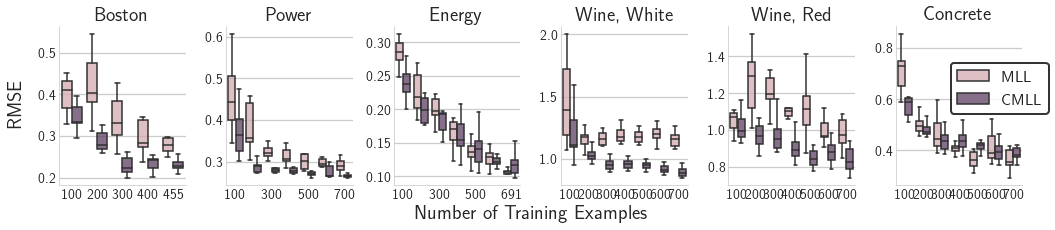

In [88]:
fig, arr = plt.subplots(1, 6, figsize=(14, 3.))
# plt.subplots_adjust(hspace=0.3)
PlotAx(arr[0], 'boston')
PlotAx(arr[1], 'power')
PlotAx(arr[2], 'energy')
PlotAx(arr[3], 'winewhite')
PlotAx(arr[4], 'winered')
box=PlotAx(arr[5], 'concrete')

arr[1].set_xticks([0, 2, 4, 6])
arr[2].set_xticks([0, 2, 4, 6])
plt.tight_layout()

legend = plt.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
          fontsize=16, bbox_to_anchor=(.37, .4))
# legend = plt.legend(
#     [box.artists[0], box.artists[1]], ['MLL', "CMLL"],
#     ncol=2, fontsize=18, bbox_to_anchor=(-0., -0.3))

legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("k")

fig.text(0.5, -0.01, "Number of Training Examples", va='center', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=20);
# plt.savefig("../../Papers/marginal_likelihood/figures/DKL/rmse_supp.pdf", bbox_inches='tight')

In [8]:
arr[1].get_xticks()

array([0, 2, 4, 6])

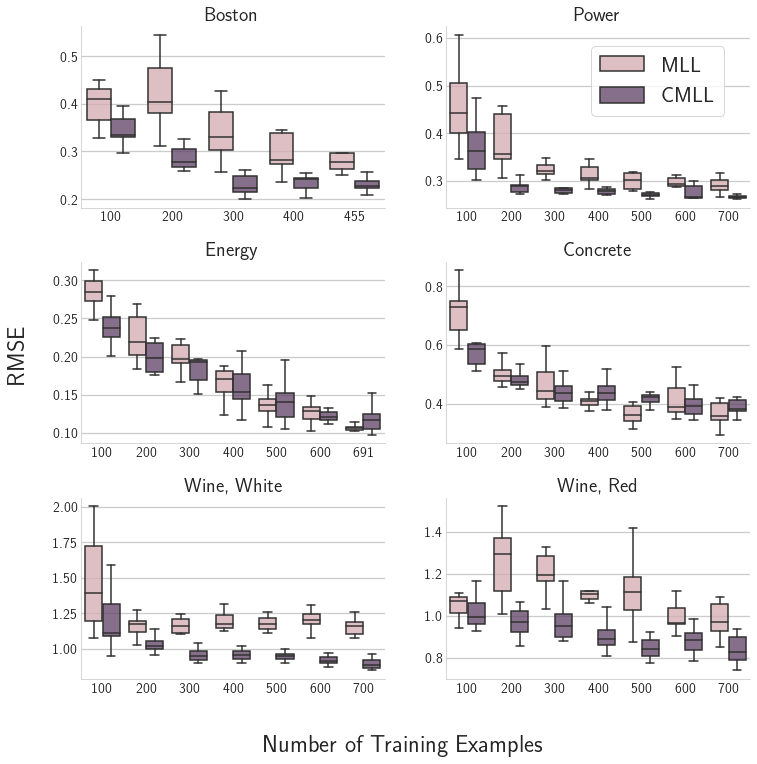

In [9]:
fig, ax = plt.subplots(3,2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)


fs = 24

PlotAx(ax[0,0], 'boston')
PlotAx(ax[0,1], 'power')
PlotAx(ax[1,0], 'energy')
PlotAx(ax[2,0], 'winewhite')
PlotAx(ax[2,1], 'winered')
box = PlotAx(ax[1,1], 'concrete')

plt.legend([box.artists[0], box.artists[1]], ['MLL', "CMLL"],
          fontsize=fs-2, bbox_to_anchor=(0.95, 3.55))
fig.text(0.5, 0.04, 'Number of Training Examples', ha='center', fontsize=fs)
fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize=fs);
# plt.savefig("./exactdkl.pdf", bbox_inches='tight')

## Transfer Learning

In [8]:
qmul = [["QMUL", 'CLML', 'RBF', 0.066, 0.08], 
        ["QMUL", "CLML", "SM", 0.076, 0.05], 
        ["QMUL", "LML", "RBF", 0.12, 0.04], 
        ["QMUL", "LML", "SM", 0.10, 0.01]]
qmul = pd.DataFrame(qmul)
qmul.columns = ["Dataset", "Type", "Kernel", "MSE", "std"]

omni = [["OMNI", 'CLML', 'Cos', 75.34, 0.35], 
        ["OMNI", "CLML", "BNCos", 76.03, 0.57], 
        ["OMNI", "CLML", "Linear", 75.64, 0.38],
        ["OMNI", 'LML', 'Cos', 73.06, 2.36], 
        ["OMNI", "LML", "BNCos", 75.06, 1.10], 
        ["OMNI", "LML", "Linear", 75.97, 0.70]]
omni = pd.DataFrame(omni)
omni.columns = ["Dataset", "Type", "Kernel", "Acc", "std"]

In [9]:
# sns.set(font_scale=2.0, style="white", rc={"lines.linewidth": 3.0})

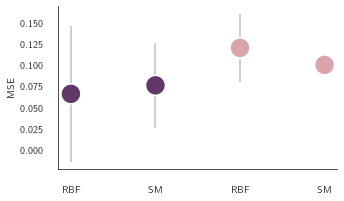

In [10]:
sz = 400
my_pal = {"LML": sanae_colors[1], "CLML": sanae_colors[4]}
sns.set_style("white")
plt.figure(figsize=(5, 3))
plt.errorbar(x=np.arange(qmul.shape[0]),y=qmul['MSE'],
            yerr=qmul['std'], fmt='none', c= 'gray', alpha=0.5, zorder=0)
sns.scatterplot(x = np.arange(qmul.shape[0]), y = 'MSE', hue='Type', data=qmul,
               palette=my_pal, s=sz, alpha=1., legend=False)

plt.xticks(np.arange(qmul.shape[0]), ["RBF", "SM", "RBF", "SM"])
sns.despine()
# plt.savefig("./qmul.pdf", bbox_inches="tight")

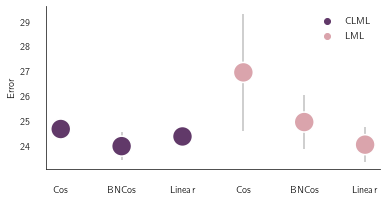

In [11]:
omni['Error'] = 100 - omni['Acc']
my_pal = {"LML": sanae_colors[1], "CLML": sanae_colors[4]}
sns.set_style("white")
plt.figure(figsize=(6, 3))
sns.scatterplot(x = np.arange(omni.shape[0]), y = 'Error', hue='Type', data=omni,
               palette=my_pal, s=sz, alpha=1.)
plt.errorbar(x=np.arange(omni.shape[0]),y=omni['Error'],
            yerr=omni['std'], fmt='none', c= 'gray', alpha=0.5, zorder=0)
plt.xticks(np.arange(omni.shape[0]), ["Cos", "BNCos", "Linear", "Cos", "BNCos", "Linear"])
plt.legend(frameon=False)
plt.ylabel("Error")
sns.despine()
# plt.savefig("./omni.pdf", bbox_inches="tight")

In [12]:
sns.set_style("whitegrid")

In [27]:
omni

,Dataset,Type,Kernel,Acc,std,Error
0,OMNI,CLML,Cos,75.34,0.35,24.66
1,OMNI,CLML,BNCos,76.03,0.57,23.97
2,OMNI,CLML,Linear,75.64,0.38,24.36
3,OMNI,LML,Cos,73.06,2.36,26.94
4,OMNI,LML,BNCos,75.06,1.10,24.94
5,OMNI,LML,Linear,75.97,0.70,24.03


In [ ]:
# def PlotAx(ax, dset, m=0.9):
#     sub_df = df[df['Dataset']==dset]
#     box = sns.boxplot(x='N', y='RMSE', hue='Type', data=sub_df[sub_df['m'].isin(['NA', m])],
#                ax=ax, showfliers=False, palette=my_pal)
#     for patch in box.artists:
#         r, g, b, a = patch.get_facecolor()
#         patch.set_facecolor((r, g, b, .75))
#     sns.despine()
#     ax.set_title(dset.capitalize(), fontsize=20)
#     if dset == 'winewhite':
#         ax.set_title("Wine, White", fontsize=20)
#     elif dset == "winered":
#         ax.set_title("Wine, Red", fontsize=20)
#     ax.tick_params(axis='both', which='major', pad=0., labelsize=14)
#     ax.set_xlabel("")
#     ax.set_ylabel("")
#     ax.legend([],[], frameon=False)
#     return box

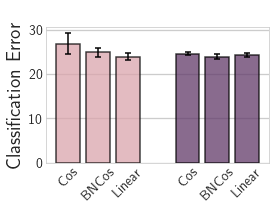

In [74]:
fig = plt.figure(figsize=(4, 2.5))

omni['Error'] = 100 - omni['Acc']
xs = [4, 5, 6, 0, 1, 2]

plt.bar(x=xs,
        height=omni["Error"],
        color=3 * [sanae_colors[4]] + 3 * [sanae_colors[1]],
        alpha=0.75, edgecolor="k", lw=1.5
       )
plt.errorbar(x=xs,y=omni['Error'],
            yerr=omni['std'], fmt='none', c='k', alpha=1., zorder=3, mew=1.5, capsize=3)

fig.get_axes()[0].tick_params(axis='both', which='major', pad=0., labelsize=14)
plt.xticks(xs,
           ["Cos", "BNCos", "Linear", "Cos", "BNCos", "Linear"],
           rotation=45, fontsize=14)
# plt.legend(frameon=False, fontsize=20)
plt.ylabel("Classification Error", fontsize=20)
plt.grid(axis="x")
plt.title("OMNI", color="w", fontsize=20)


plt.savefig("../../Papers/marginal_likelihood/figures/DKL/omni.pdf", bbox_inches='tight')
# plt.savefig("./rmse_small.pdf", bbox_inches="tight")

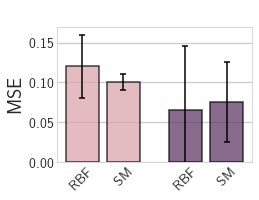

In [72]:
fig = plt.figure(figsize=(3.5, 2.5))

omni['Error'] = 100 - omni['Acc']
xs = [2.5, 3.5, 0, 1]

plt.bar(x=xs,
        height=qmul['MSE'],
        color=2 * [sanae_colors[4]] + 2 * [sanae_colors[1]],
        alpha=0.75, edgecolor="k", lw=1.5
       )
plt.errorbar(x=xs,y=qmul['MSE'],
            yerr=qmul['std'], fmt='none', c='k', alpha=1., zorder=3, mew=1.5, capsize=3)

fig.get_axes()[0].tick_params(axis='both', which='major', pad=0., labelsize=14)
plt.xticks(xs,
           ["RBF", "SM", "RBF", "SM"],
           rotation=45, fontsize=14)
# plt.legend(frameon=False, fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.grid(axis="x")
plt.ylim(0., 0.17)
plt.title("QMUL", color="w", fontsize=20)

plt.savefig("../../Papers/marginal_likelihood/figures/DKL/qmul.pdf", bbox_inches='tight')
# plt.savefig("./rmse_small.pdf", bbox_inches="tight")